In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import plotly.express as px

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
import time

from sklearn import metrics


In [2]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
data = pd.read_csv('dataset_sdn.csv')

In [5]:
import time
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

class Model:
    def __init__(self, data, y):
        self.data = data
        self.y = y

        X = np.asarray(self.data)
        y = np.asarray(self.y)

        self.scaler = StandardScaler()  # Save scaler as an instance variable
        X = self.scaler.fit_transform(X)

        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=0.3, random_state=42
        )

    def LogisticRegression(self):
        solvers = ['lbfgs', 'liblinear']
        start_time = time.time()

        best_accuracy = 0
        best_model = None

        for solver in solvers:
            LR = LogisticRegression(solver=solver, max_iter=1000).fit(self.X_train, self.y_train)
            predicted_lr = LR.predict(self.X_test)
            accuracy_lr = accuracy_score(self.y_test, predicted_lr)

            if accuracy_lr > best_accuracy:
                best_accuracy = accuracy_lr
                best_model = LR

            print(f"Accuracy with {solver}: {round(accuracy_lr * 100, 2)}%")
            print("########################################################################")
            print(f'Solver used: {solver}')
            print("########################################################################")
            print(classification_report(self.y_test, predicted_lr), '\n')

        print("########################################################################")
        print(f"--- {time.time() - start_time} seconds --- time for LogisticRegression")
        return best_model

    def SupportVectorMachine(self):
        start_time = time.time()
        kernels = ['linear', 'poly', 'rbf', 'sigmoid']

        best_accuracy = 0
        best_kernel = None
        best_model = None

        for kernel in kernels:
            SVM = SVC(kernel=kernel).fit(self.X_train, self.y_train)
            predicted_svm = SVM.predict(self.X_test)
            accuracy_svm = accuracy_score(self.y_test, predicted_svm)

            if accuracy_svm > best_accuracy:
                best_accuracy = accuracy_svm
                best_kernel = kernel
                best_model = SVM

        predicted_svm = best_model.predict(self.X_test)

        print(f"Accuracy of SVM model: {round(best_accuracy*100,2)}%")
        print("########################################################################")
        print(f'Best kernel is: {best_kernel}')
        print("########################################################################")
        print(classification_report(self.y_test, predicted_svm))
        print("########################################################################")
        print(f"--- {time.time() - start_time} seconds ---")
        return best_model

    def KNearestNeighbor(self):
        start_time = time.time()
        Ks = 12
        accuracy_knn = np.zeros((Ks-1))
        std_acc = np.zeros((Ks-1))

        for n in range(1, Ks):
            neigh = KNeighborsClassifier(n_neighbors=n).fit(self.X_train, self.y_train)
            yhat = neigh.predict(self.X_test)
            accuracy_knn[n-1] = accuracy_score(self.y_test, yhat)
            std_acc[n-1] = np.std(yhat == self.y_test)/np.sqrt(yhat.shape[0])

        plt.figure(figsize=(10,6))
        plt.plot(range(1,Ks), accuracy_knn, 'g')
        plt.fill_between(range(1,Ks), accuracy_knn - std_acc, accuracy_knn + std_acc, alpha=0.10)
        plt.fill_between(range(1,Ks), accuracy_knn - 3 * std_acc, accuracy_knn + 3 * std_acc, alpha=0.10, color="green")
        plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
        plt.ylabel('Accuracy')
        plt.xlabel('Number of Neighbors (K)')
        plt.tight_layout()
        plt.show()

        best_k = accuracy_knn.argmax() + 1
        KNN = KNeighborsClassifier(n_neighbors=best_k).fit(self.X_train, self.y_train)
        predicted_knn = KNN.predict(self.X_test)
        accuracy_knn_final = accuracy_score(self.y_test, predicted_knn)

        print(f"Accuracy of KNN model (K={best_k}): {round(accuracy_knn_final*100,2)}%")
        print("########################################################################")
        print(classification_report(self.y_test, predicted_knn))
        print("########################################################################")
        print(f"--- {time.time() - start_time} seconds ---")
        return KNN

    def RandomForest(self):
        start_time = time.time()

        RF = RandomForestClassifier(
            n_estimators=500,
            max_depth=16,
            random_state=1
        ).fit(self.X_train, self.y_train)

        predicted_rf = RF.predict(self.X_test)
        rf_accuracy = accuracy_score(self.y_test, predicted_rf)

        print(f"Accuracy of RF is: {round(rf_accuracy*100,2)}%")
        print("########################################################################")
        print(classification_report(self.y_test, predicted_rf))
        print("########################################################################")
        print(f"--- {time.time() - start_time} seconds ---")
        return RF

    def predict(self, model, new_data_df):
        """
        Utility method to scale new data and predict using the given model.
        Assumes new_data_df is a DataFrame with same features used in training.
        """
        X_new = new_data_df.values
        X_scaled = self.scaler.transform(X_new)
        return model.predict(X_scaled)


In [6]:
df1 = data.copy()

In [7]:
df1 = df1.dropna()

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103839 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           103839 non-null  int64  
 1   switch       103839 non-null  int64  
 2   src          103839 non-null  object 
 3   dst          103839 non-null  object 
 4   pktcount     103839 non-null  int64  
 5   bytecount    103839 non-null  int64  
 6   dur          103839 non-null  int64  
 7   dur_nsec     103839 non-null  int64  
 8   tot_dur      103839 non-null  float64
 9   flows        103839 non-null  int64  
 10  packetins    103839 non-null  int64  
 11  pktperflow   103839 non-null  int64  
 12  byteperflow  103839 non-null  int64  
 13  pktrate      103839 non-null  int64  
 14  Pairflow     103839 non-null  int64  
 15  Protocol     103839 non-null  object 
 16  port_no      103839 non-null  int64  
 17  tx_bytes     103839 non-null  int64  
 18  rx_bytes     103839 non-

In [9]:
important_features = [
    'src',
    'pktcount',
    'dst',
    'byteperflow',
    'pktperflow',
    'pktrate',
    'tot_kbps',
    'rx_kbps',
    'flows',
    'bytecount',
    'dt',
    'Protocol',
    'dur',
    'tot_dur'
]

weights = [
    17.87,
    15.16,
    13.64,
    12.97,
    11.35,
    11.35,
    9.68,
    9.66,
    8.95,
    4.92,
    2.33,
    1.31,
    1.11,
    1.11
]

In [10]:
weighted_features = pd.DataFrame({'features':important_features,
                                 'weights':weights})
weighted_features

,features,weights
0,src,17.87
1,pktcount,15.16
2,dst,13.64
3,byteperflow,12.97
4,pktperflow,11.35
5,pktrate,11.35
6,tot_kbps,9.68
7,rx_kbps,9.66
8,flows,8.95
9,bytecount,4.92


In [11]:
### But we dont need src, dst, dt, So, we will drop them
X = df1[important_features]
y = df1.label

X = X.drop(['src', 'dst', 'dt'], axis=1)

In [12]:
X.head()

,pktcount,byteperflow,pktperflow,pktrate,tot_kbps,rx_kbps,flows,bytecount,Protocol,dur,tot_dur
0,45304,14428310,13535,451,0.0,0.0,3,48294064,UDP,100,1.010000e+11
1,126395,14424046,13531,451,0.0,0.0,2,134737070,UDP,280,2.810000e+11
2,90333,14427244,13534,451,0.0,0.0,3,96294978,UDP,200,2.010000e+11
3,90333,14427244,13534,451,0.0,0.0,3,96294978,UDP,200,2.010000e+11
4,90333,14427244,13534,451,0.0,0.0,3,96294978,UDP,200,2.010000e+11


In [13]:
abs(X.corr())

,pktcount,byteperflow,pktperflow,pktrate,tot_kbps,rx_kbps,flows,bytecount,dur,tot_dur
pktcount,1.000000,0.290614,0.470065,0.470097,0.003054,0.002328,0.257467,0.675792,0.023222,0.023283
byteperflow,0.290614,1.000000,0.812940,0.812940,0.150260,0.114963,0.246311,0.533201,0.259843,0.259831
pktperflow,0.470065,0.812940,1.000000,0.999999,0.162416,0.124257,0.212795,0.333530,0.329504,0.329483
pktrate,0.470097,0.812940,0.999999,1.000000,0.162461,0.124291,0.212924,0.333553,0.329764,0.329744
tot_kbps,0.003054,0.150260,0.162416,0.162461,1.000000,0.635545,0.240285,0.076920,0.218143,0.218268
rx_kbps,0.002328,0.114963,0.124257,0.124291,0.635545,1.000000,0.183821,0.058850,0.166916,0.167011
flows,0.257467,0.246311,0.212795,0.212924,0.240285,0.183821,1.000000,0.244514,0.176351,0.176352
bytecount,0.675792,0.533201,0.333530,0.333553,0.076920,0.058850,0.244514,1.000000,0.038033,0.038034
dur,0.023222,0.259843,0.329504,0.329764,0.218143,0.166916,0.176351,0.038033,1.000000,0.999998
tot_dur,0.023283,0.259831,0.329483,0.329744,0.218268,0.167011,0.176352,0.038034,0.999998,1.000000


<AxesSubplot:>

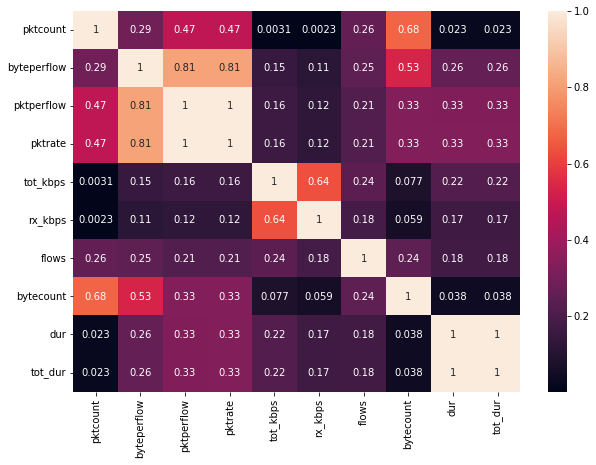

In [14]:
fig, ax = plt.subplots(figsize=(10,7)) 
sns.heatmap(abs(X.corr()), annot=True)

In [15]:
## "dur" and "tot_dur"
## "pktperflow" and "pktrate"

X = X.drop(['dur', "pktrate", "pktperflow"], axis=1)

In [16]:
X.head()

,pktcount,byteperflow,tot_kbps,rx_kbps,flows,bytecount,Protocol,tot_dur
0,45304,14428310,0.0,0.0,3,48294064,UDP,1.010000e+11
1,126395,14424046,0.0,0.0,2,134737070,UDP,2.810000e+11
2,90333,14427244,0.0,0.0,3,96294978,UDP,2.010000e+11
3,90333,14427244,0.0,0.0,3,96294978,UDP,2.010000e+11
4,90333,14427244,0.0,0.0,3,96294978,UDP,2.010000e+11


<AxesSubplot:>

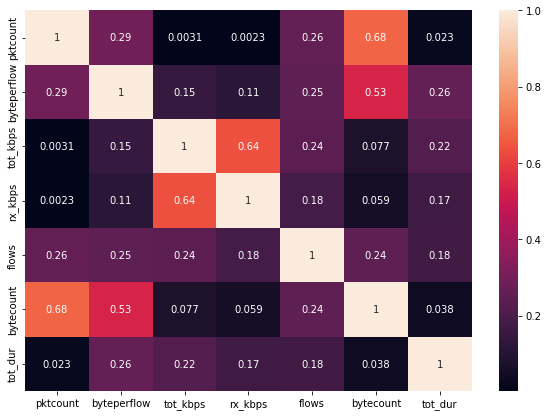

In [17]:
fig, ax = plt.subplots(figsize=(10,7)) 
sns.heatmap(abs(X.corr()), annot=True)

In [18]:
X = pd.get_dummies(X)
X.head()

,pktcount,byteperflow,tot_kbps,rx_kbps,flows,bytecount,tot_dur,Protocol_ICMP,Protocol_TCP,Protocol_UDP
0,45304,14428310,0.0,0.0,3,48294064,1.010000e+11,0,0,1
1,126395,14424046,0.0,0.0,2,134737070,2.810000e+11,0,0,1
2,90333,14427244,0.0,0.0,3,96294978,2.010000e+11,0,0,1
3,90333,14427244,0.0,0.0,3,96294978,2.010000e+11,0,0,1
4,90333,14427244,0.0,0.0,3,96294978,2.010000e+11,0,0,1


In [19]:

M = Model(X, y)  # ✅ Provide both X and y


In [20]:
lr_model = M.LogisticRegression()

Accuracy with lbfgs: 75.23%
########################################################################
Solver used: lbfgs
########################################################################
              precision    recall  f1-score   support

           0       0.77      0.85      0.81     18986
           1       0.72      0.60      0.65     12166

    accuracy                           0.75     31152
   macro avg       0.74      0.73      0.73     31152
weighted avg       0.75      0.75      0.75     31152
 

Accuracy with liblinear: 75.23%
########################################################################
Solver used: liblinear
########################################################################
              precision    recall  f1-score   support

           0       0.77      0.85      0.81     18986
           1       0.72      0.60      0.65     12166

    accuracy                           0.75     31152
   macro avg       0.74      0.73      0.73     31152
weigh

In [21]:
svm_model = M.SupportVectorMachine()

Accuracy of SVM model: 91.77%
########################################################################
Best kernel is: rbf
########################################################################
              precision    recall  f1-score   support

           0       0.96      0.90      0.93     18986
           1       0.86      0.95      0.90     12166

    accuracy                           0.92     31152
   macro avg       0.91      0.92      0.91     31152
weighted avg       0.92      0.92      0.92     31152

########################################################################
--- 1140.8920001983643 seconds ---


In [22]:
rf_model = M.RandomForest()

Accuracy of RF is: 98.64%
########################################################################
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     18986
           1       0.97      1.00      0.98     12166

    accuracy                           0.99     31152
   macro avg       0.98      0.99      0.99     31152
weighted avg       0.99      0.99      0.99     31152

########################################################################
--- 30.379865169525146 seconds ---


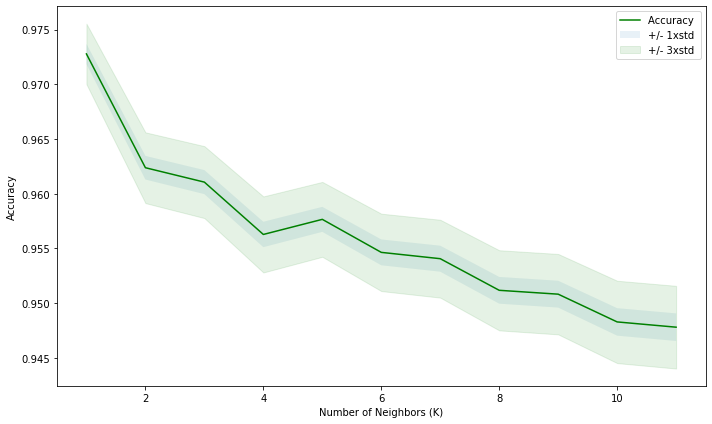

Accuracy of KNN model (K=1): 97.28%
########################################################################
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     18986
           1       0.97      0.96      0.97     12166

    accuracy                           0.97     31152
   macro avg       0.97      0.97      0.97     31152
weighted avg       0.97      0.97      0.97     31152

########################################################################
--- 28.5030620098114 seconds ---


In [23]:
knn_model = M.KNearestNeighbor()

# Predict


## Preprecesssing

In [45]:
import pandas as pd

def preprocess_input_data(csv_path, expected_protocols=['Protocol_ICMP', 'Protocol_TCP', 'Protocol_UDP']):
    # Read the CSV file
    df = pd.read_csv(csv_path)

    # Remove rows where 'tot_dur' is 0
    df = df[df['tot_dur'] != 0]

    # One-hot encode the Protocol column
    df_encoded = pd.get_dummies(df, columns=['Protocol'])

    # Rename new one-hot columns to match expected column names (e.g., Protocol_UDP)
    df_encoded.columns = [col if not col.startswith('Protocol_') else f'Protocol_{col.split("_")[1].upper()}' for col in df_encoded.columns]

    # Add missing protocol columns with 0 values
    for protocol in expected_protocols:
        if protocol not in df_encoded.columns:
            df_encoded[protocol] = 0

    # Reorder the columns to match training data
    final_columns = [col for col in df.columns if col != 'Protocol'] + expected_protocols
    df_encoded = df_encoded[final_columns]

    return df_encoded


In [47]:
df_cleaned = preprocess_input_data("flow_data_attack.csv")

In [48]:
df_cleaned.head()

,pktcount,byteperflow,tot_kbps,rx_kbps,flows,bytecount,tot_dur,Protocol_ICMP,Protocol_TCP,Protocol_UDP
0,81,83.48,0.14,0.07,81,6762,386.54,1,0,0
5,14,191.33,0.21,0.10,6,1148,43.62,1,0,0
8,9,1783.00,79.91,37.56,2,3566,0.36,0,1,0
12,2,42.00,0.05,0.02,2,84,13.74,1,0,0
13,36,972.00,370.29,174.03,2,1944,0.04,0,1,0


In [49]:
predictions = M.predict(lr_model, df_cleaned)

print(predictions)

[0 0 0 0 0 0 0]


In [50]:
predictions = M.predict(svm_model, df_cleaned)

print(predictions)

[0 0 1 0 1 1 0]


In [51]:
predictions = M.predict(rf_model, df_cleaned)

print(predictions)

[0 0 1 0 1 1 0]


In [52]:
predictions = M.predict(knn_model, df_cleaned)

print(predictions)

[1 0 1 0 1 1 0]


In [53]:
df_cleaned

,pktcount,byteperflow,tot_kbps,rx_kbps,flows,bytecount,tot_dur,Protocol_ICMP,Protocol_TCP,Protocol_UDP
0,81,83.48,0.14,0.07,81,6762,386.54,1,0,0
5,14,191.33,0.21,0.10,6,1148,43.62,1,0,0
8,9,1783.00,79.91,37.56,2,3566,0.36,0,1,0
12,2,42.00,0.05,0.02,2,84,13.74,1,0,0
13,36,972.00,370.29,174.03,2,1944,0.04,0,1,0
16,9960,89632.00,114.51,53.82,6,537792,37.57,0,1,0
20,2,42.00,0.04,0.02,2,84,19.05,1,0,0
